In [6]:
# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
# set visualization style
sns.set(style='whitegrid')
import os

### Load Data from CSV file of the comppany

In [7]:
hdfc = pd.read_csv('/workspaces/stock_price_prediction.model/Inputs/hdfc_bank_data.csv')
sbi = pd.read_csv('/workspaces/stock_price_prediction.model/Inputs/sbi_data.csv')
icici = pd.read_csv('/workspaces/stock_price_prediction.model/Inputs/icici_bank_data.csv')

hdfc['Date'] = pd.to_datetime(hdfc['Date'])
sbi['Date'] = pd.to_datetime(sbi['Date'])
icici['Date'] = pd.to_datetime(icici['Date'])

# preview each dataset

print('hdfc Data:\n', hdfc.head())
print('sbi Data:\n', sbi.head())
print('icici Data:\n', icici.head())

hdfc Data:
         Date         Open         High          Low        Close   Volume
0 2022-05-30  1360.510904  1370.399390  1349.127040  1352.117798  6312337
1 2022-05-31  1346.667105  1355.253228  1331.327869  1339.962158  6742694
2 2022-06-01  1331.327831  1351.056519  1330.507834  1345.654053  6045948
3 2022-06-02  1338.322119  1339.045666  1329.977178  1336.247925  5737510
4 2022-06-03  1348.982455  1351.345998  1327.758388  1331.617310  3478622
sbi Data:
         Date        Open        High         Low       Close    Volume
0 2022-05-30  447.348550  451.037042  445.551596  448.861786   9365470
1 2022-05-31  448.294293  450.564131  439.782376  442.714264  15441579
2 2022-06-01  442.619693  446.402767  439.498668  442.903412   9424008
3 2022-06-02  441.579356  446.733806  440.870029  444.369385   9370989
4 2022-06-03  447.584984  449.712964  438.363741  439.309509  11306291
icici Data:
         Date        Open        High         Low       Close    Volume
0 2022-05-30  731.90636

### Data Overview and structure of data

In [8]:
#Shape of dataset
print('HDFC Shape:', hdfc.shape)
print('Sbi shape:', sbi.shape)
print('Icici Shape:', icici.shape)

#Column names
print('hdfc columns:', hdfc.columns)
print('sbi columns:', sbi.columns)
print('icici columns:', icici.columns)

# Data types and null values
for df, name in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI']):
    print(f"\n{name} Info:")
    print(df.info())
    print(f"\n{name} Null Values:\n", df.isnull().sum())

HDFC Shape: (741, 6)
Sbi shape: (741, 6)
Icici Shape: (741, 6)
hdfc columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
sbi columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
icici columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

HDFC Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    741 non-null    datetime64[ns]
 1   Open    741 non-null    float64       
 2   High    741 non-null    float64       
 3   Low     741 non-null    float64       
 4   Close   741 non-null    float64       
 5   Volume  741 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 34.9 KB
None

HDFC Null Values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

SBI Info:
<class 'pandas

In [9]:
# Descriptive statistics for each dataset
for df, name in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI']):
    print(f"\n{name} Descriptive Statistics:")
    print(df.describe())


HDFC Descriptive Statistics:
                                Date         Open         High          Low  \
count                            741   741.000000   741.000000   741.000000   
mean   2023-11-26 08:46:38.380567040  1568.733294  1581.581667  1556.797883   
min              2022-05-30 00:00:00  1230.031093  1253.184619  1226.750986   
25%              2023-02-22 00:00:00  1461.299906  1475.072800  1450.954448   
50%              2023-11-24 00:00:00  1576.882766  1587.897806  1564.441249   
75%              2024-08-29 00:00:00  1642.846400  1657.713272  1629.127891   
max              2025-05-29 00:00:00  1957.366856  1957.366856  1913.944584   
std                              NaN   140.936322   141.511872   139.550733   

             Close        Volume  
count   741.000000  7.410000e+02  
mean   1569.279083  1.512762e+07  
min    1236.109009  0.000000e+00  
25%    1467.011353  7.592403e+06  
50%    1576.687622  1.266125e+07  
75%    1644.310791  1.809180e+07  
max    1940.3

### Data Cleaning Handle missing or incorrect data.

In [10]:
# fill missing values (if any) with forward fill

for df in [hdfc, sbi, icici]:
    df.fillna(method = 'ffill', inplace = True)
# Ensure no missing values remain
for df, name in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI']):
    print(f"{name} Missing values after cleaning:\n", df.isnull().sum())

HDFC Missing values after cleaning:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
SBI Missing values after cleaning:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
ICICI Missing values after cleaning:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


/tmp/ipykernel_28721/762871448.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill', inplace = True)


# Visualization
 ### 1. Time Series Plot

  Visualize  stock  price  over  time 

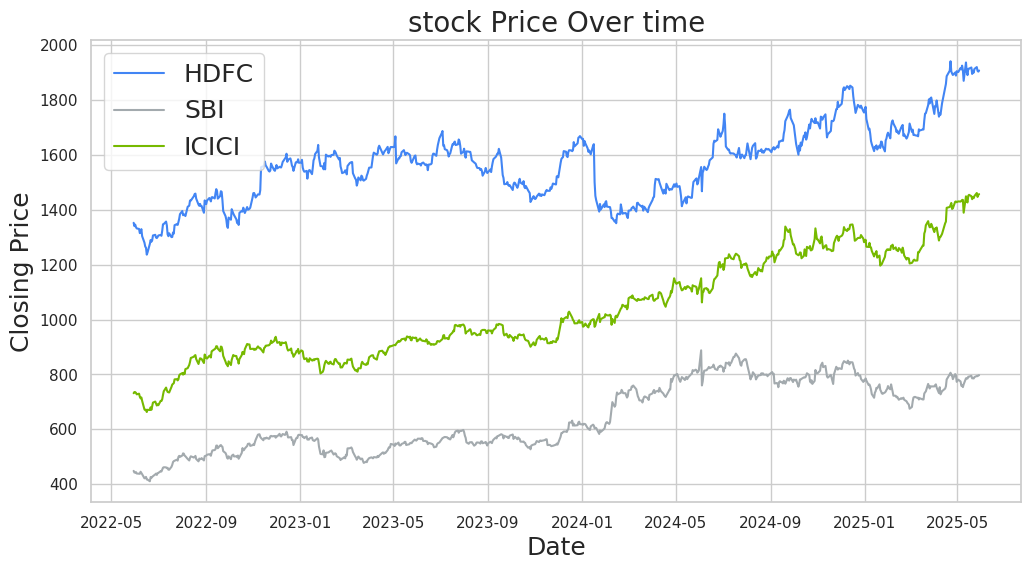

In [11]:
plt.figure(figsize=(12, 6))
for df, label, col, in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI'], ['#4285F4','#A3AAAE', '#76B900']):
    plt.plot(pd.to_datetime(df['Date']), df['Close'], label=label, color = col)
plt.title('stock Price Over time', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

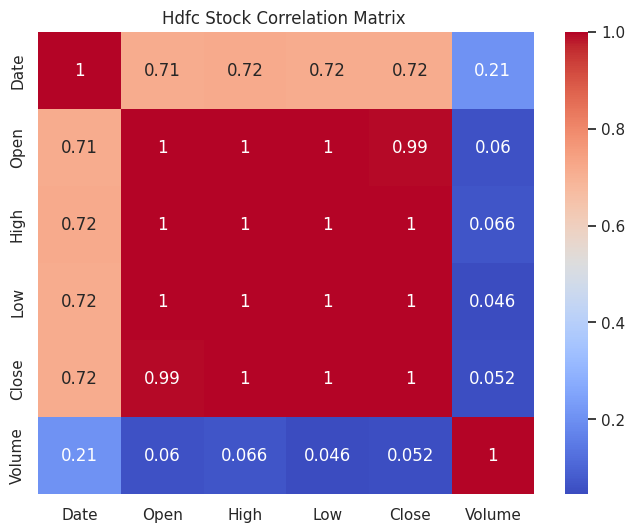

In [12]:
# Correlation for hdfc
hdfc_corr = hdfc.corr()

#Heatmap
plt.figure(figsize = (8,6))
sns.heatmap(hdfc_corr, annot = True, cmap = 'coolwarm')
plt.title('Hdfc Stock Correlation Matrix ')
plt.show()

# Volume of Sales 

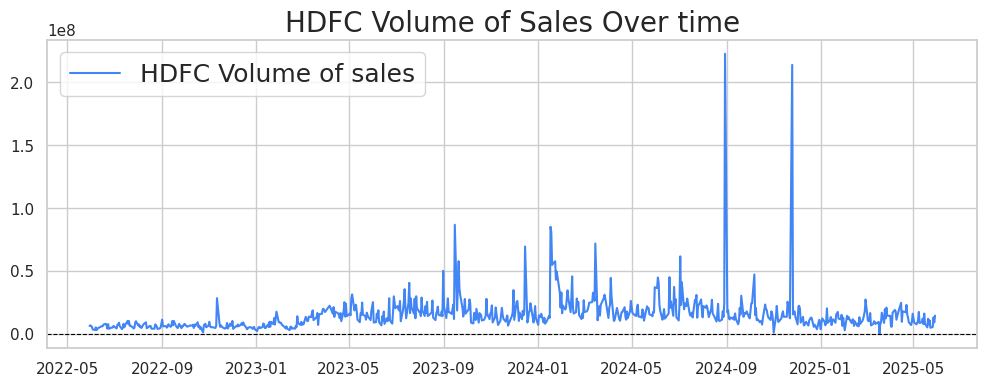

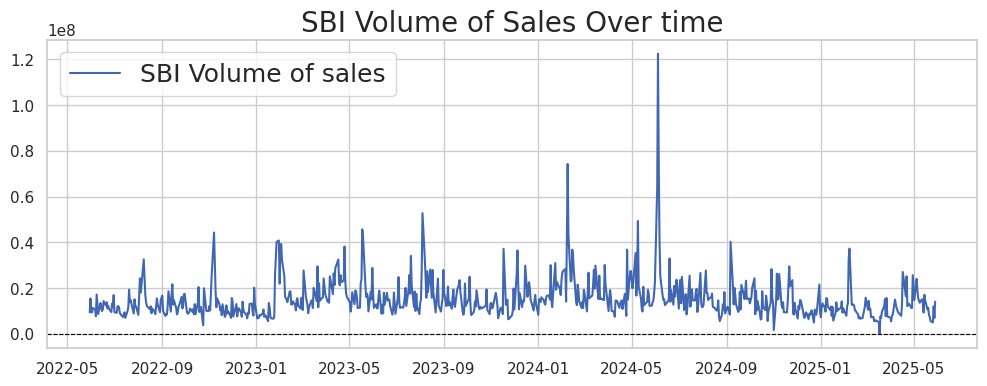

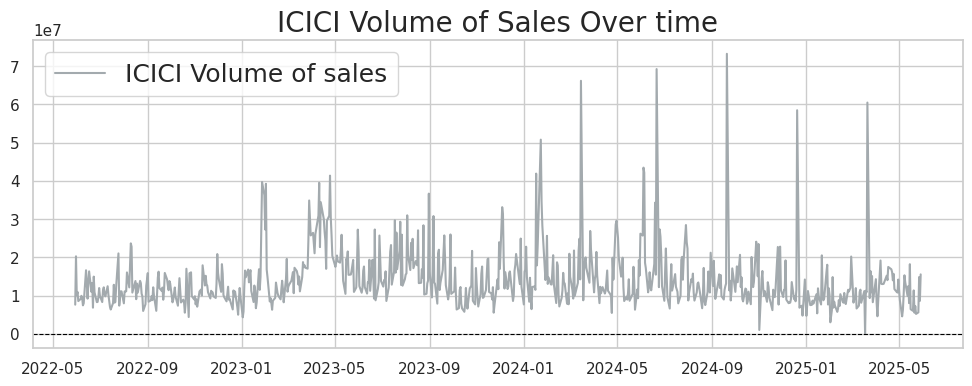

In [13]:
# Add daily return for each dataset.

for df, name, col, in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI'],["#4285F4","#4267B2","#A3AAAE"]):
    plt.figure(figsize=(12, 4))
    plt.plot(pd.to_datetime(df['Date']), df['Volume'], label = f'{name} Volume of sales', color = col)
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 0.8)
    plt.title(f'{name} Volume of Sales Over time', fontsize = 20)
    plt.legend(fontsize = 18)
    plt.show()

### Calculating daily return and ploting daily percentage return

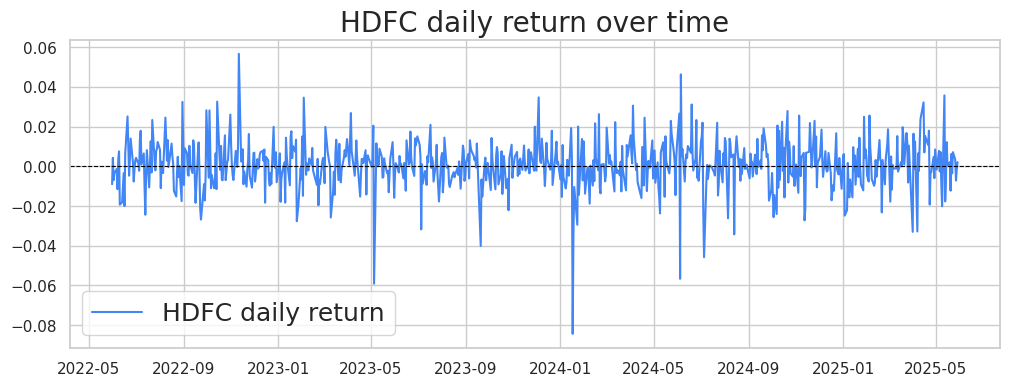

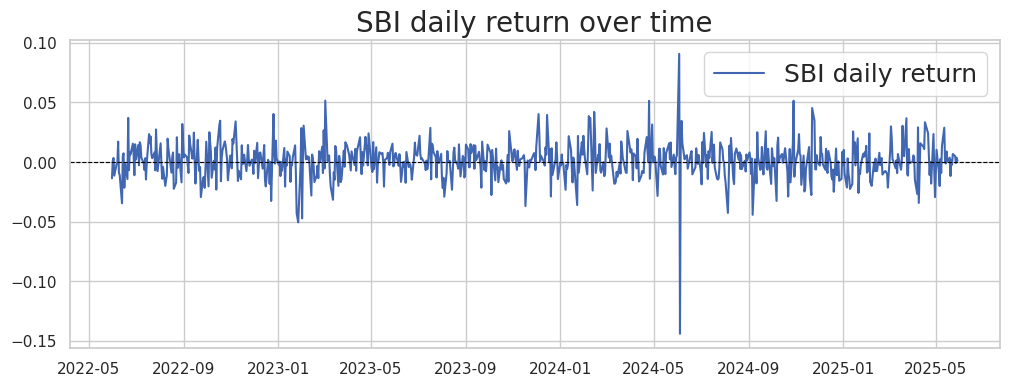

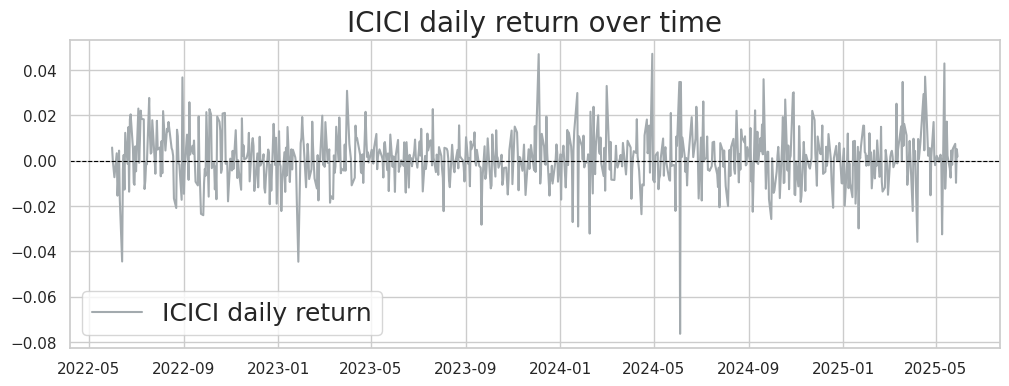

In [14]:
for df, name, col, in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI'],["#4285F4","#4267B2","#A3AAAE"]):
    df['daily_return'] = df['Close'].pct_change()
    plt.figure(figsize=(12, 4))
    plt.plot(pd.to_datetime(df['Date']), df['daily_return'], label = f'{name} daily return', color = col)
    plt.axhline(0, color = 'black', linestyle ='--', linewidth=0.8)
    plt.title(f'{name} daily return over time', fontsize = 20)
    plt.legend(fontsize = 18)
    plt.show()

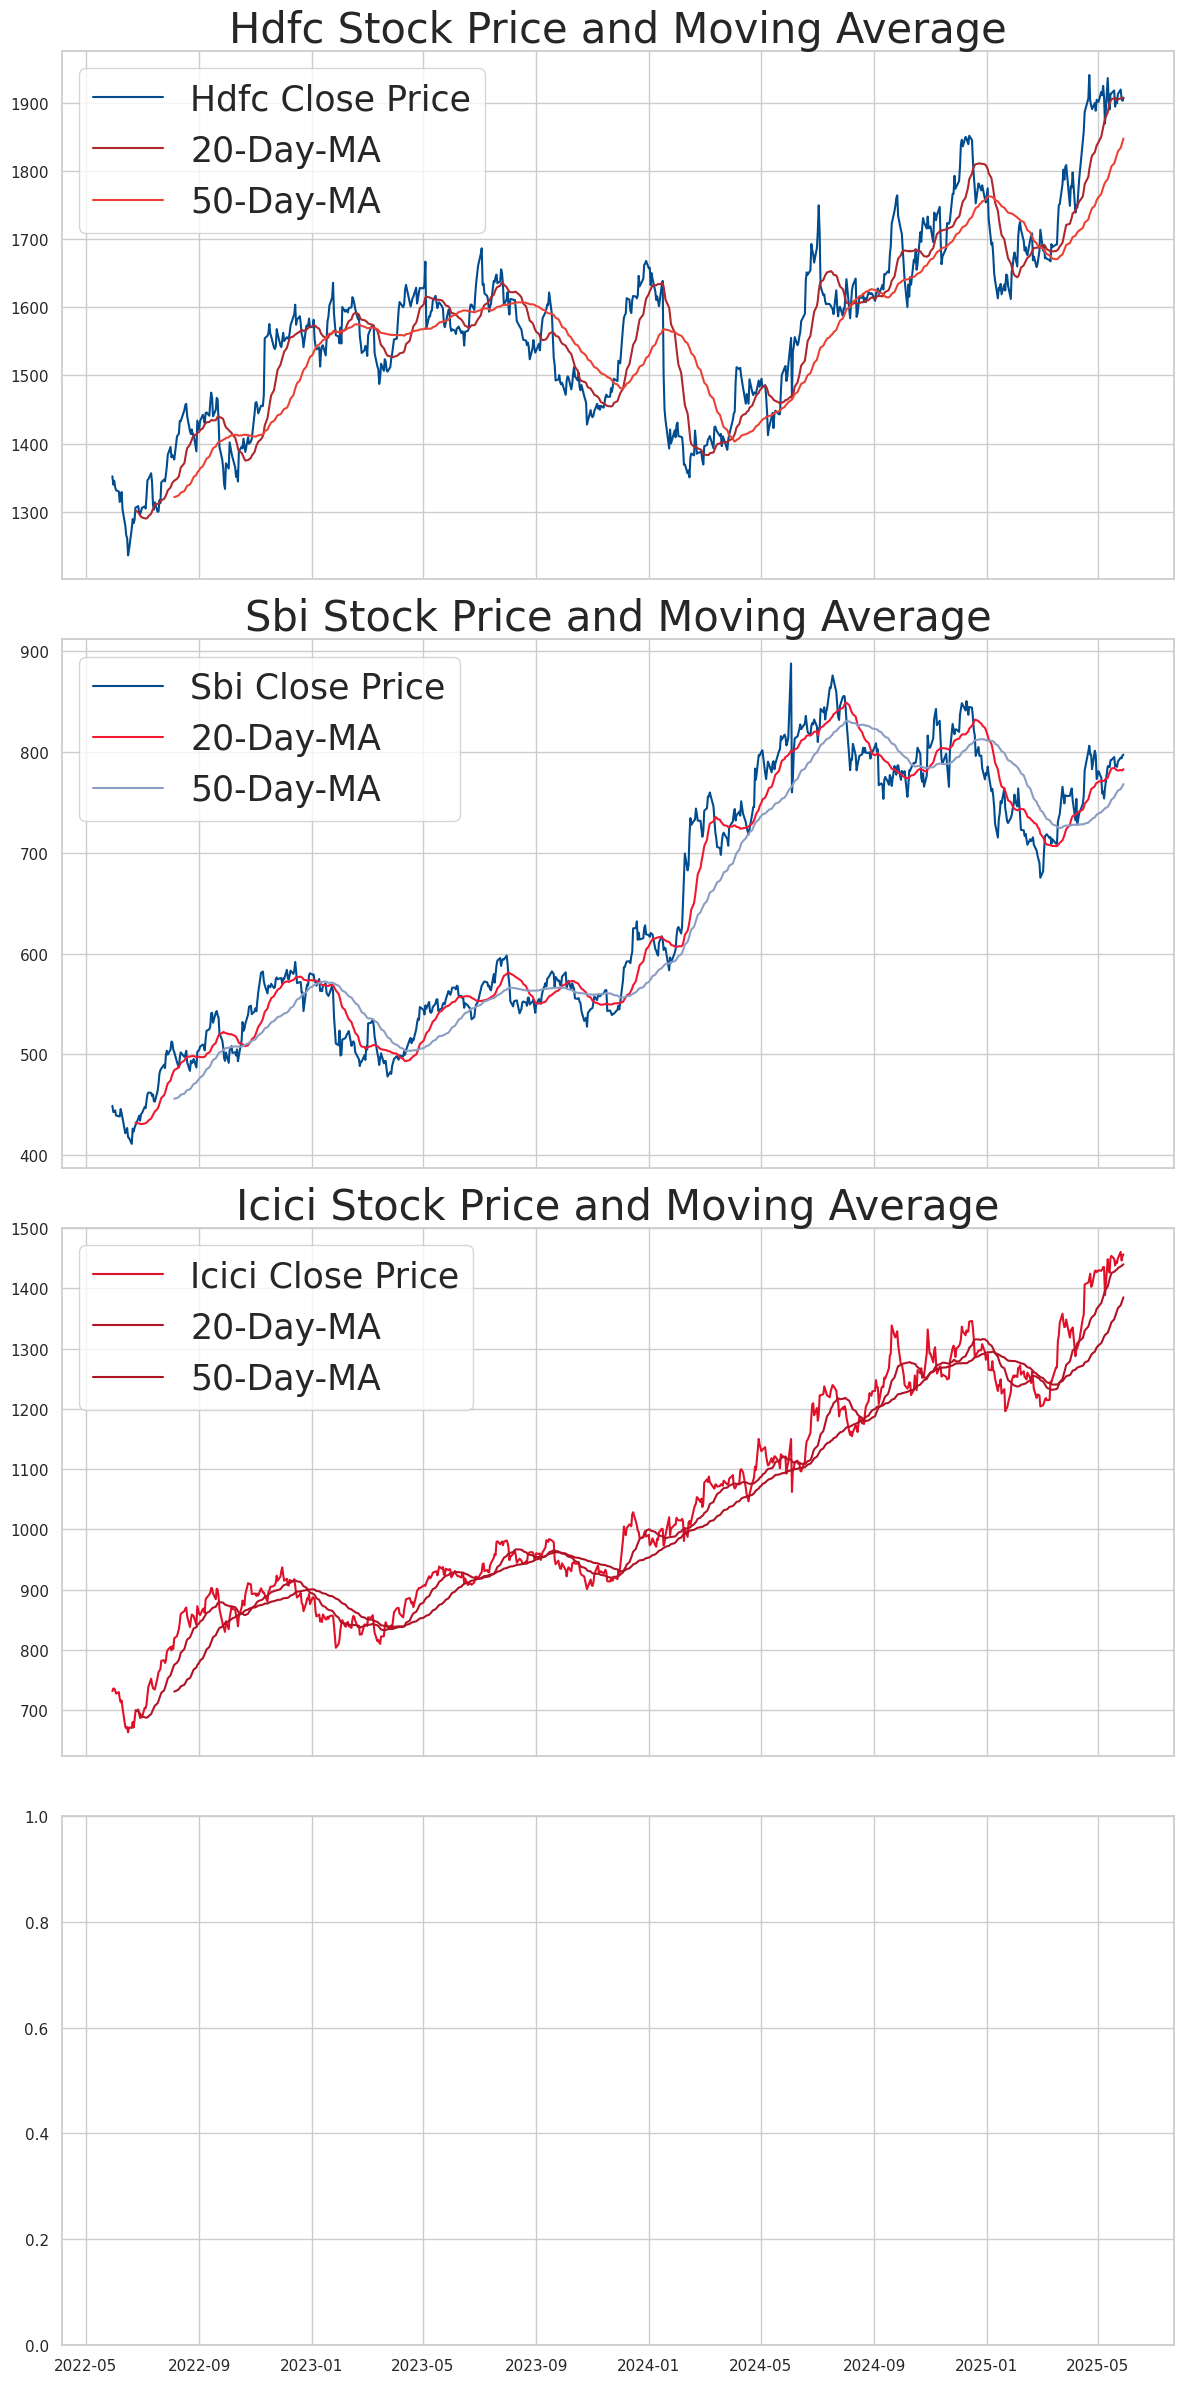

In [15]:
# Assuming data for each company is in Dataframes.
companies = {'Hdfc':hdfc,
            'Sbi':sbi,
            'Icici':icici}

# Colors inspired by each company's logo
colors = {'Hdfc':['#004C8F','#AE282E','#EA4335'],
          'Sbi':['#004C8F',"#F21831",'#8B9DC3'],
          'Icici':["#DF1028", "#B41427",'#B01224']}

# Adding Moving Average (20-days and 50-days)
for name, df in companies.items():
    df['20_day_ma'] = df['Close'].rolling(window=20).mean()
    df['50_day_ma'] = df['Close'].rolling(window=50).mean()

# plot stock prices and moving averages for all companies
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(12,24), sharex=True) 

for ax, (name,df) in zip(axes, companies.items()):
    ax.plot(pd.to_datetime(df['Date']),df['Close'], label=f'{name} Close Price', color = colors[name][0])
    ax.plot(pd.to_datetime(df['Date']), df['20_day_ma'], label='20-Day-MA', color=colors[name][1])
    ax.plot(pd.to_datetime(df['Date']), df['50_day_ma'], label='50-Day-MA', color=colors[name][2])
    ax.set_title(f'{name} Stock Price and Moving Average', fontsize = 30)
    ax.legend(fontsize=25)

plt.tight_layout()
plt.show()


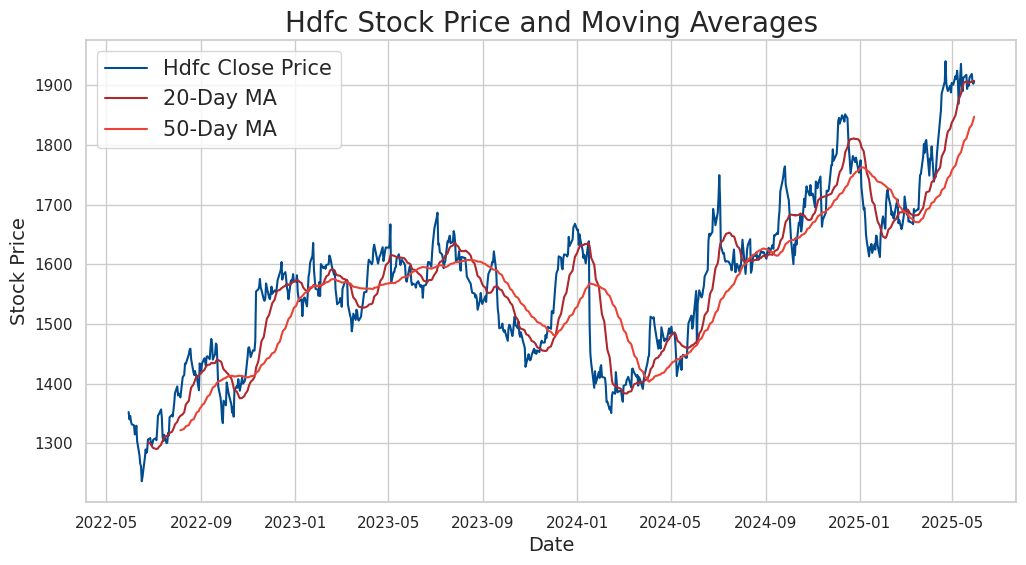

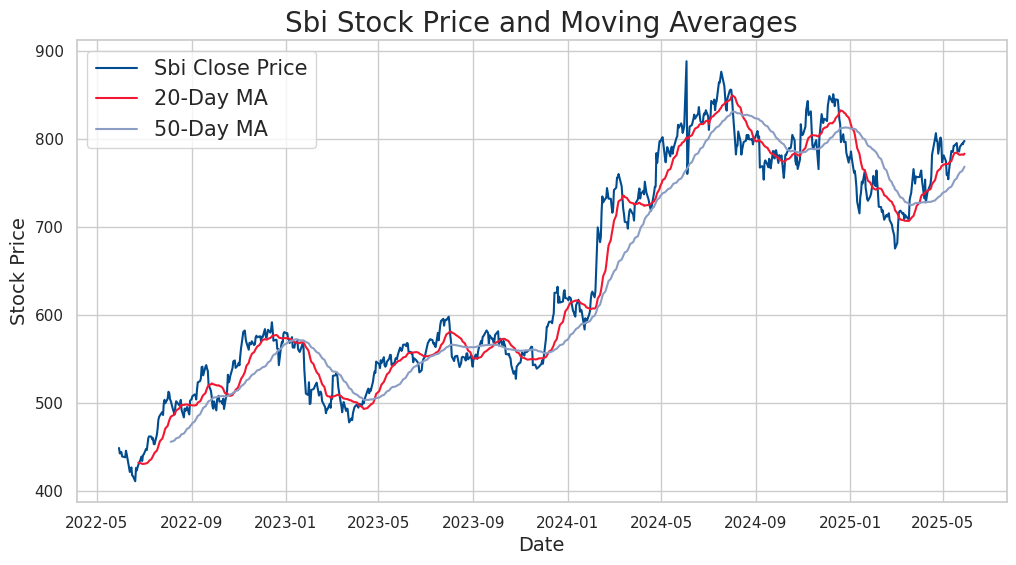

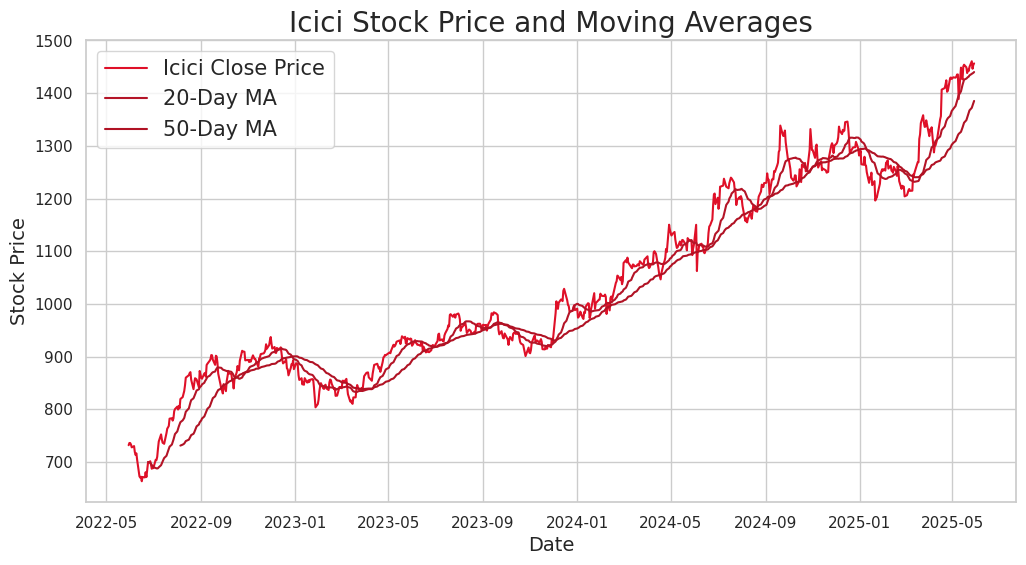

Figures saved successfully in the 'eda' folder.


In [16]:
companies = {'Hdfc':hdfc,
            'Sbi':sbi,
            'Icici':icici}

# Colors inspired by each company's logo
colors = {'Hdfc':['#004C8F','#AE282E','#EA4335'],
          'Sbi':['#004C8F',"#F21831",'#8B9DC3'],
          'Icici':["#DF1028", "#B41427",'#B01224']}

for name, df in companies.items():
    df['20_day_ma'] = df['Close'].rolling(window=20).mean()
    df['50_day_ma'] = df['Close'].rolling(window=50).mean()

#Plot and save figure for each company.
for name, df in companies.items():
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df['Date']), df['Close'], label=f'{name} Close Price', color=colors[name][0])
    plt.plot(pd.to_datetime(df['Date']), df['20_day_ma'], label='20-Day MA', color=colors[name][1])
    plt.plot(pd.to_datetime(df['Date']), df['50_day_ma'], label='50-Day MA', color=colors[name][2])
    plt.title(f'{name} Stock Price and Moving Averages', fontsize=20)
    plt.legend(fontsize=15)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price', fontsize=14)
    plt.grid(True)
    
    # Save the figure in the 'eda' folder
    plt.savefig(f'{name}_stock_price_MA.png', dpi=300)
    plt.show()
    plt.close()

print("Figures saved successfully in the 'eda' folder.")


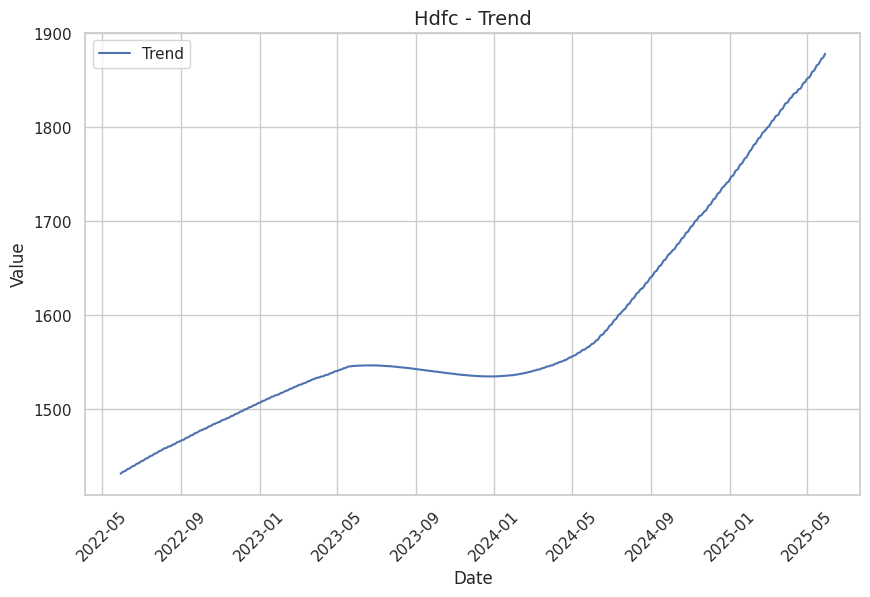

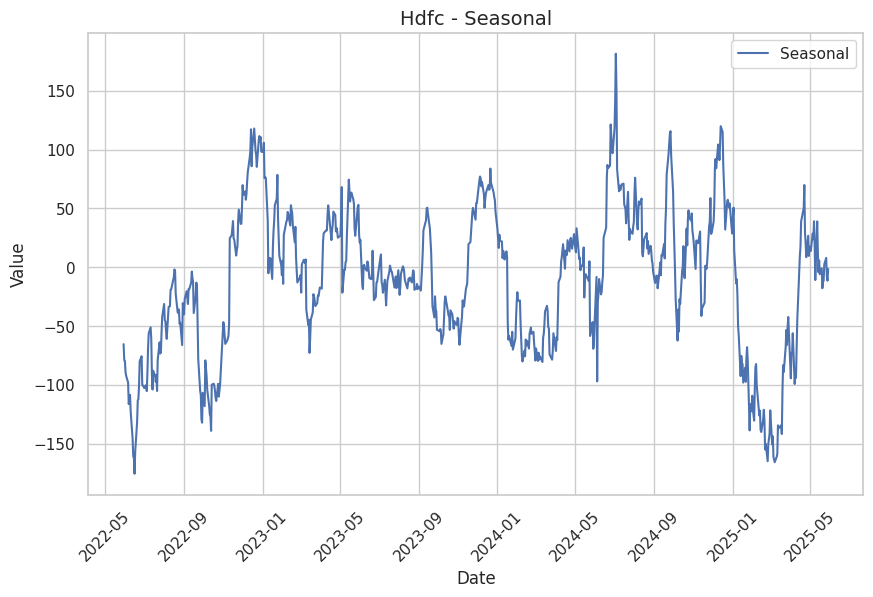

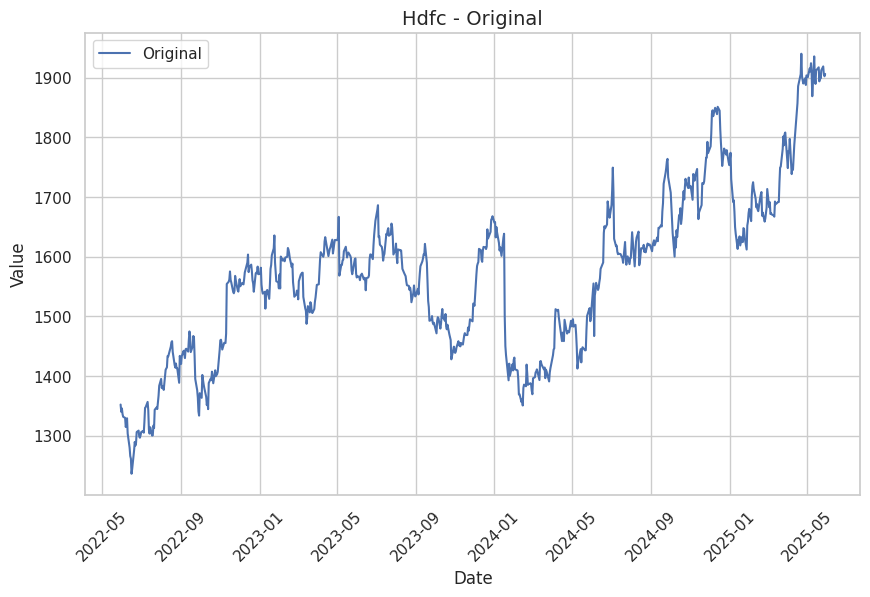

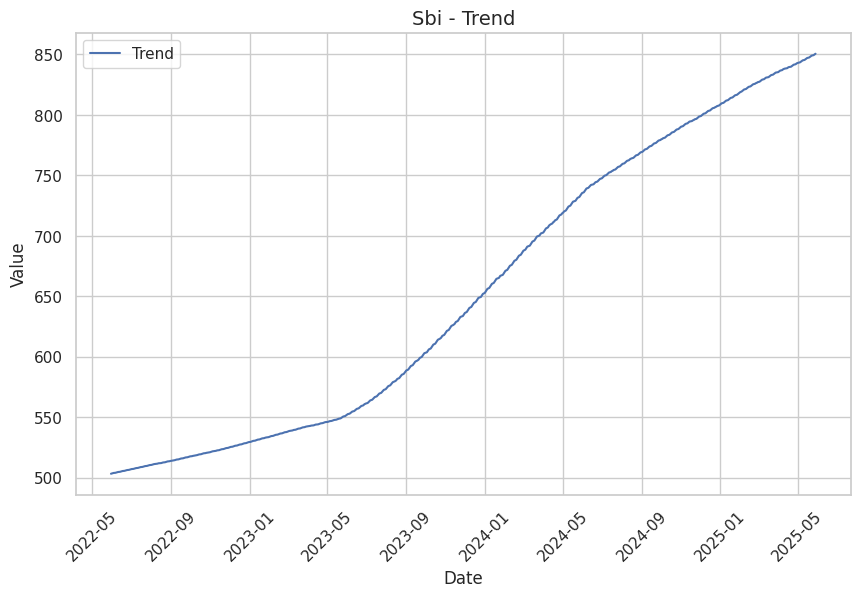

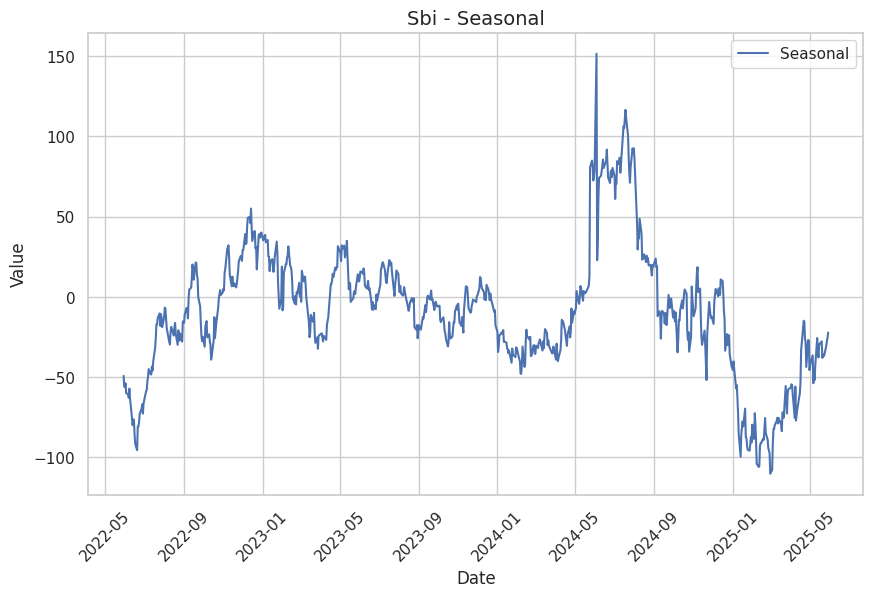

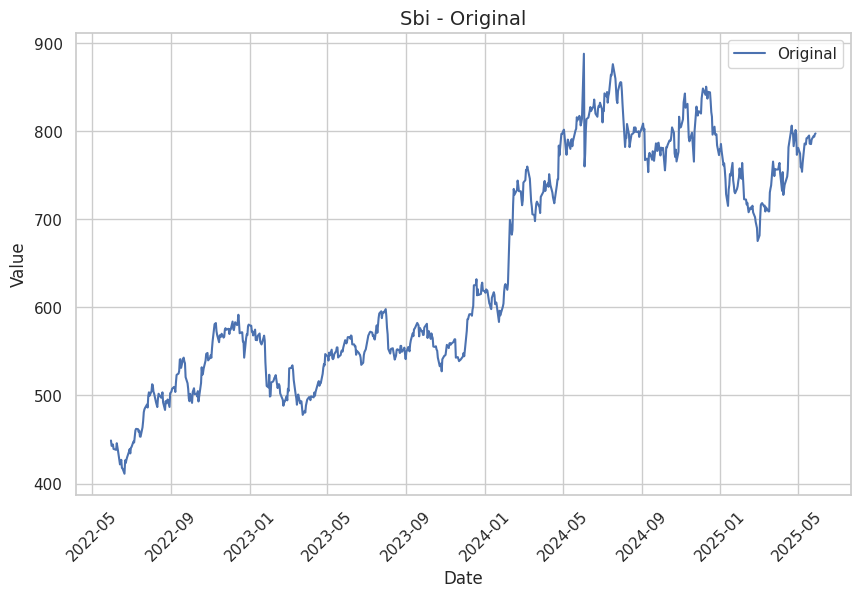

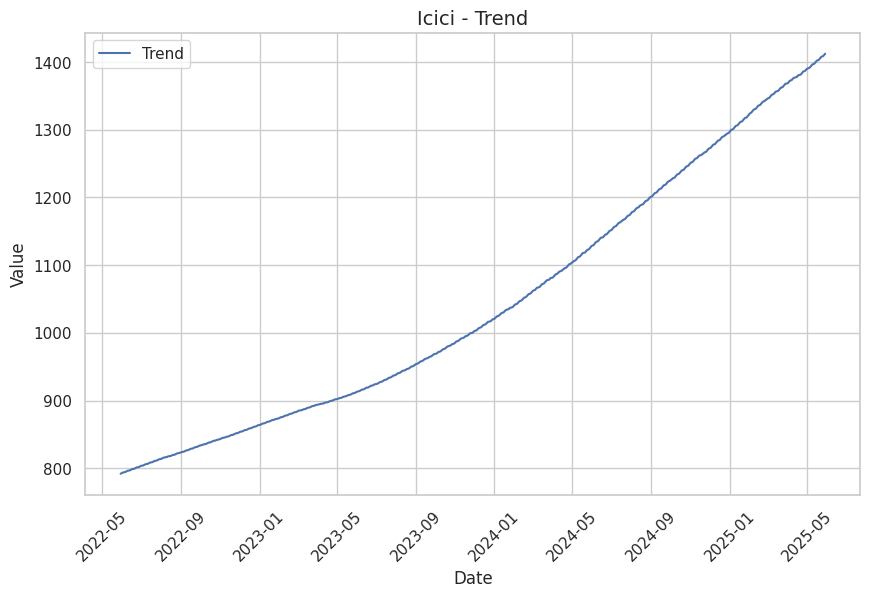

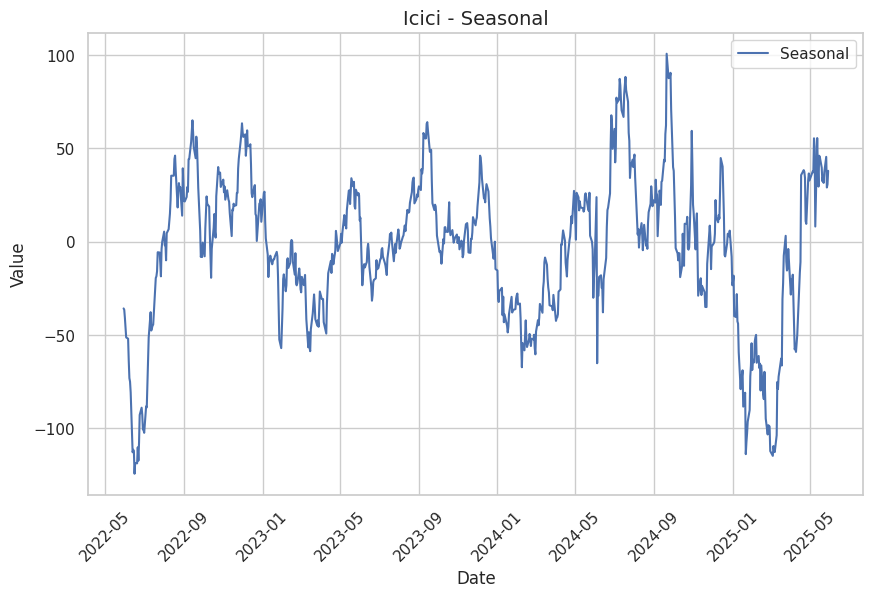

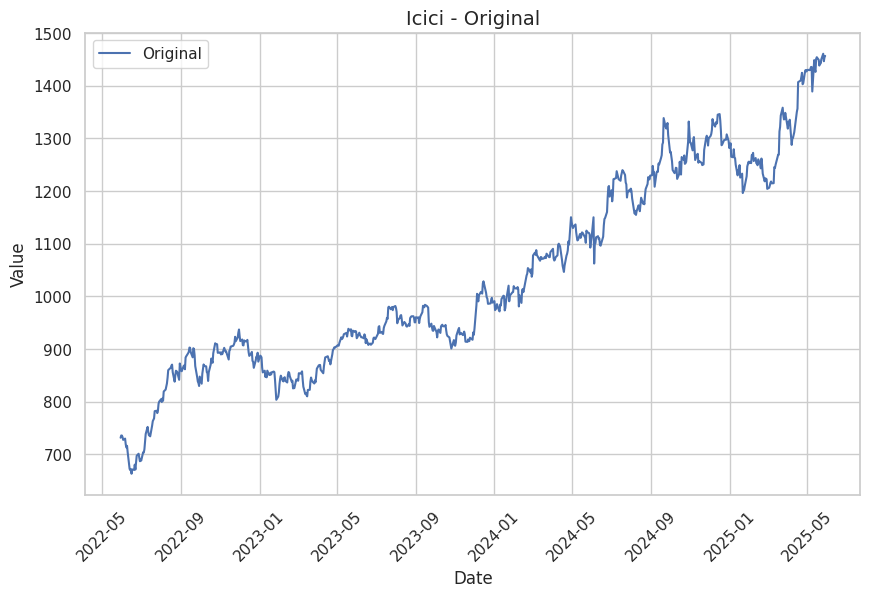

Decomposition figure saved successfully in EDA folder


In [20]:
from statsmodels.tsa.seasonal import STL
from pathlib import Path
companies = {'Hdfc':hdfc,
            'Sbi':sbi,
            'Icici':icici}
for company, original_df in companies.items():
    # create a temporary copy of the Dataframe to avoid modifying the original.
    df_temp = original_df.copy()
    if 'Date' in df_temp.columns:
        df_temp['Date'] = pd.to_datetime(df_temp['Date'])
        df_temp.set_index('Date', inplace= True)
    else:
        print(f"Warning:'Date' column not found in {company} data. Skipping..")
        continue
    # Decompose using STL with seasonal period set to 252 (assuming year seasonality)
    stl = STL(df_temp['Close'], period = 252)
    result = stl.fit()
    #Save each component as a seperate plot.
    components = {'Trend':result.trend,
                  'Seasonal':result.seasonal,
                  'Original':df_temp['Close']}
    for comp_name, comp_data in components.items():
        plt.figure(figsize=(10,6))
        plt.plot(comp_data, label=comp_name, color = 'b' if comp_name != 'Residual' else 'r')
        plt.title(f'{company} - {comp_name}', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Value', fontsize=12)
        plt.grid(True)
        plt.xticks(rotation=45)   
        plt.legend()

        # Save the graph
        save_path = f'{company}_{comp_name}.png'
        plt.savefig(save_path, dpi=300)
        plt.show()
        plt.close()
print('Decomposition figure saved successfully in EDA folder')         



          Hdfc         Sbi       Icici
0  1352.117798  448.861786  731.661987
1  1339.962158  442.714264  735.914001
2  1345.654053  442.903412  735.718628
3  1336.247925  444.369385  732.883789
4  1331.617310  439.309509  727.556396
Index(['Hdfc', 'Sbi', 'Icici'], dtype='object')
   index Company  Close Price
0      0    Hdfc  1352.117798
1      1    Hdfc  1339.962158
2      2    Hdfc  1345.654053
3      3    Hdfc  1336.247925
4      4    Hdfc  1331.617310


/tmp/ipykernel_28721/4167457162.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_data, x='Company', y='Close Price', palette=palette)


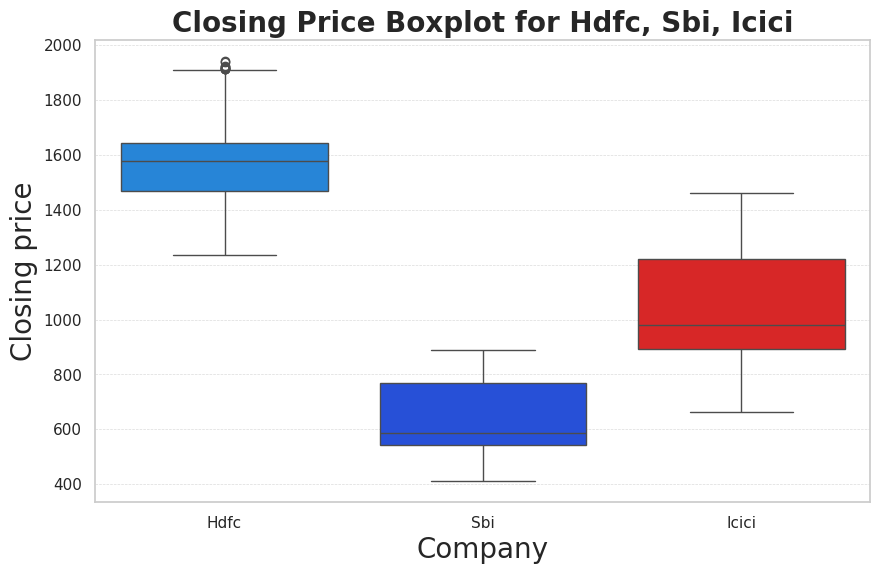

In [25]:
# Combine 'Close' prices from all datasets into a single Dataframe
combined_data = pd.DataFrame({'Hdfc':hdfc['Close'],
                              'Sbi':sbi['Close'],
                              'Icici':icici['Close']})
print(combined_data.head())
print(combined_data.columns)

# Ensure a sequential index column is created
combined_data = combined_data.reset_index(names = 'index')

# Melt the data for seaborn compatibility
melted_data = combined_data.melt(id_vars=['index'],
                                 var_name = 'Company',
                                 value_name='Close Price')

# Debugging step: Print melted data structure
print(melted_data.head())

# company-specific colors.
company_color = {'Hdfc':"#0A87F4",
                 'Sbi':"#0A41F4",
                 'Icici':"#F40A0AC8"}
# Map company names to their respective colors
palette = [company_color[company] for company in melted_data['Company'].unique()]
# Boxplot for all companies
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_data, x='Company', y='Close Price', palette=palette)
plt.title('Closing Price Boxplot for Hdfc, Sbi, Icici',fontsize=20, fontweight='bold')
plt.ylabel('Closing price', fontsize=20)
plt.xlabel('Company',fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('close_distribution.png', dpi=300,bbox_inches='tight')
plt.show()

### Outlier Removal-
Outlier can be removed using the Interquartile Range(IQR) method. Here's the code:


In [26]:
def remove_outlier(df, column):
    """
    Remove Outlier from a specified column in the DataFrame using the IQR method
    """
    Q1 = df[column].quantile(0.25) # first quartile
    Q3 = df[column].quantile(0.75) # third quartile
    IQR = Q3 - Q1
    
    # Define lower and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply outlier removal to each company's Close prices
hdfc_cleaned = remove_outlier(hdfc, 'Close')
sbi_cleaned = remove_outlier(sbi, 'Close')
icici_cleaned = remove_outlier(icici, 'Close')

# Check the shapes before and after
print(f"Hdfc: {hdfc.shape[0]} -> {hdfc_cleaned.shape[0]} rows after outlier removal")
print(f"Sbi: {sbi.shape[0]} -> {sbi_cleaned.shape[0]} rows after outlier removal")
print(f"Icici: {icici.shape[0]} -> {icici_cleaned.shape[0]} rows after outlier removal")




Hdfc: 741 -> 731 rows after outlier removal
Sbi: 741 -> 741 rows after outlier removal
Icici: 741 -> 741 rows after outlier removal


   index Company  Close Price
0      0    Hdfc  1352.117798
1      1    Hdfc  1339.962158
2      2    Hdfc  1345.654053
3      3    Hdfc  1336.247925
4      4    Hdfc  1331.617310


/tmp/ipykernel_28721/4294177065.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_melted_data, x='Company', y='Close Price', palette=palette)


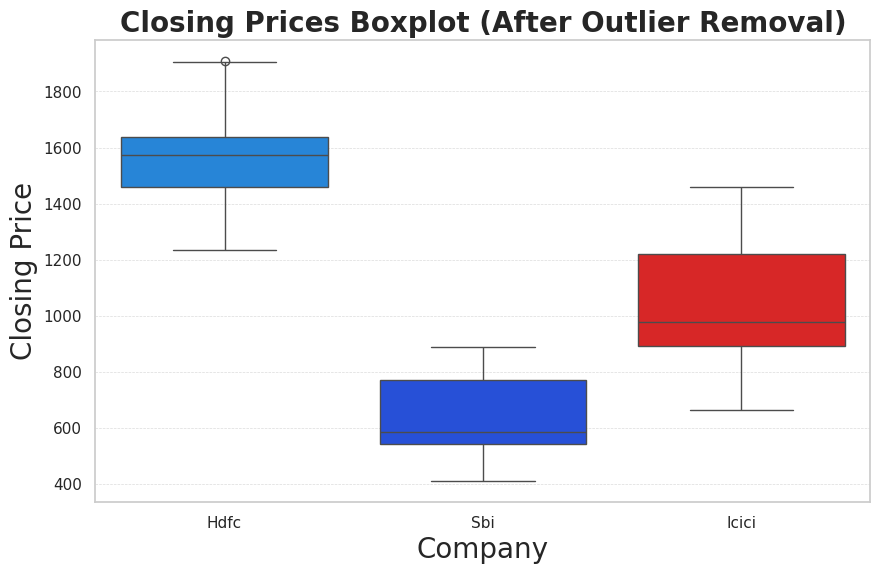

In [27]:
# Combine cleaned 'Close' prices into a single DataFrame

cleaned_combined_data = pd.DataFrame({'Hdfc':hdfc_cleaned['Close'],
                                      'Sbi':sbi_cleaned['Close'],
                                      'Icici':icici_cleaned['Close']
})

# Add a sequential index explicitly (ensure 'index' column exists)
cleaned_combined_data = cleaned_combined_data.reset_index(names='index')

# Melt the data for Seaborn compatibility
cleaned_melted_data = cleaned_combined_data.melt(id_vars=['index'], 
                                                 var_name='Company', 
                                                 value_name='Close Price')

# Debugging step: Print the melted data to check its structure
print(cleaned_melted_data.head())

# Company-specific colors
company_colors = {'Hdfc':"#0A87F4",
                 'Sbi':"#0A41F4",
                 'Icici':"#F40A0AC8"}

# Map company names to their respective colors
palette = [company_colors[company] for company in cleaned_melted_data['Company'].unique()]

# Boxplot for cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_melted_data, x='Company', y='Close Price', palette=palette)
plt.title('Closing Prices Boxplot (After Outlier Removal)', fontsize=20, fontweight='bold')
plt.ylabel('Closing Price', fontsize=20)
plt.xlabel('Company', fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)  # Add light gridlines for readability
plt.savefig('close_disrubition_outliers.png', dpi=300, bbox_inches='tight')
plt.show()





                                      